<a href="https://colab.research.google.com/github/HosseinSadeghi-dev/machine-learning/blob/main/Digikala/Digikala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [161]:
def en_to_fa(num, formatter='%1.1f%%'):
    num_as_string = formatter % num
    mapping = dict(list(zip('0123456789.%', '۰۱۲۳۴۵۶۷۸۹.%')))
    return ''.join(mapping[digit] for digit in num_as_string)

In [128]:
digikala_data = pd.read_csv('https://github.com/HosseinSadeghi-dev/machine-learning/blob/main/Digikala/csv/digikala-orders.csv?raw=true')
digikala_data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054.0,469662.0,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039.0,3063877.0,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130.0,3184893.0,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624.0,6888562.0,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771.0,2533490.0,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [129]:
digikala_data['InvoiceDate'] = pd.to_datetime(digikala_data['DateTime_CartFinalize'], errors='coerce')
digikala_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceDate
0,2714054.0,469662.0,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56
1,11104039.0,3063877.0,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26
2,4228130.0,3184893.0,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08
3,22225624.0,6888562.0,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19
4,4068771.0,2533490.0,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02


In [130]:
digikala_data['InvoiceYearMonth'] = digikala_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
digikala_data.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceDate,InvoiceYearMonth
0,2714054.0,469662.0,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56,201510.0
1,11104039.0,3063877.0,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26,201802.0
2,4228130.0,3184893.0,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08,201606.0
3,22225624.0,6888562.0,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19,201809.0
4,4068771.0,2533490.0,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02,201605.0


In [131]:
revenue = digikala_data.groupby(['InvoiceYearMonth']).sum().reset_index()
revenue

,InvoiceYearMonth,ID_Order,ID_Customer,Quantity_item
0,201309.0,6.007770e+06,3.643236e+06,7.0
1,201310.0,7.193883e+07,4.508139e+07,75.0
2,201311.0,8.840454e+07,5.399986e+07,99.0
3,201312.0,1.178565e+08,7.225199e+07,120.0
4,201401.0,1.469213e+08,9.051780e+07,150.0
...,...,...,...,...
59,201808.0,1.252374e+11,2.051869e+10,7618.0
60,201809.0,1.407994e+11,2.208913e+10,8468.0
61,201810.0,1.240945e+11,1.900938e+10,7005.0
62,201811.0,1.381673e+11,2.016201e+10,7249.0


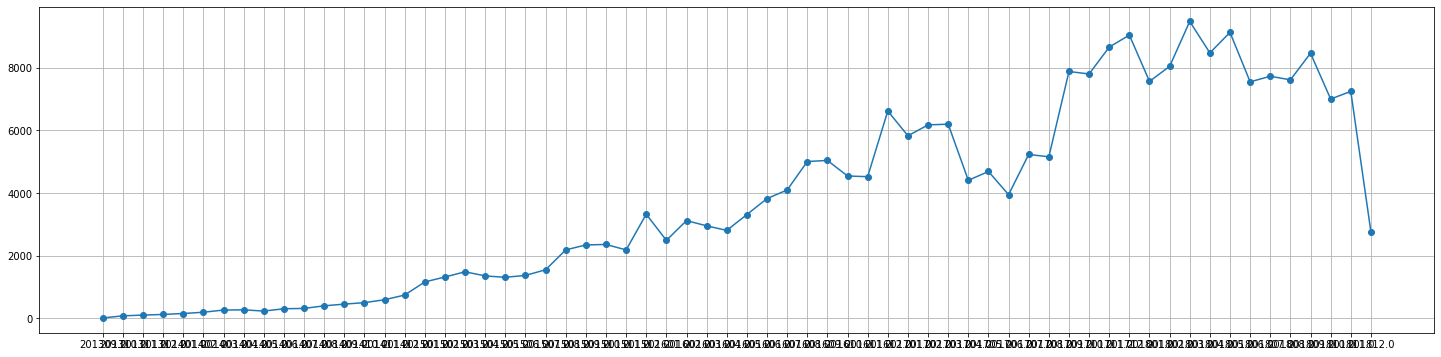

In [134]:
plt.figure(figsize=(25, 6))
plt.plot(revenue['InvoiceYearMonth'].to_numpy(dtype='str'), revenue['Quantity_item'], marker='o')
plt.grid()

In [165]:
city = digikala_data.groupby(['city_name_fa']).sum().reset_index()
city['others'] = city['Quantity_item'] / city['Quantity_item'].sum() * 100
city

,city_name_fa,ID_Order,ID_Customer,Quantity_item,InvoiceYearMonth,others
0,1.0,0.000000e+00,3.857260e+05,0.0,0.0,0.000000
1,آب بر,1.132562e+08,4.517340e+07,15.0,3024423.0,0.006222
2,آبادان,3.909047e+09,1.211335e+09,453.0,77652648.0,0.187898
3,آباده,6.959251e+08,2.059193e+08,81.0,13714299.0,0.033598
4,آباده طشک,3.863704e+07,1.510047e+07,3.0,605220.0,0.001244
...,...,...,...,...,...,...
891,گیوی,1.172054e+08,3.916944e+07,18.0,2420571.0,0.007466
892,یاسوج,2.762478e+09,8.439276e+08,322.0,52646742.0,0.133561
893,یاسوکند,3.646149e+07,1.317065e+07,2.0,403615.0,0.000830
894,یامچی,1.156805e+07,6.179800e+06,1.0,201803.0,0.000415


In [166]:
new_row = pd.DataFrame(
    data={'city_name_fa': ['دیگر شهر ها'], 'others': city.query("others < 1.5")['others'].sum()})
city = pd.concat([city, new_row])
city

,city_name_fa,ID_Order,ID_Customer,Quantity_item,InvoiceYearMonth,others
0,1.0,0.000000e+00,3.857260e+05,0.0,0.0,0.000000
1,آب بر,1.132562e+08,4.517340e+07,15.0,3024423.0,0.006222
2,آبادان,3.909047e+09,1.211335e+09,453.0,77652648.0,0.187898
3,آباده,6.959251e+08,2.059193e+08,81.0,13714299.0,0.033598
4,آباده طشک,3.863704e+07,1.510047e+07,3.0,605220.0,0.001244
...,...,...,...,...,...,...
892,یاسوج,2.762478e+09,8.439276e+08,322.0,52646742.0,0.133561
893,یاسوکند,3.646149e+07,1.317065e+07,2.0,403615.0,0.000830
894,یامچی,1.156805e+07,6.179800e+06,1.0,201803.0,0.000415
895,یزد,1.925423e+10,5.563995e+09,2946.0,402584478.0,1.221960


([<matplotlib.patches.Wedge at 0x7f4802e0db50>,
 [Text(1.0950757665858704, 0.10396665540628323, 'ﻥﺎﻬﻔﺻﺍ'),
  Text(1.0633913672175386, 0.2814228138001861, 'ﺯﺍﻮﻫﺍ'),
  Text(-0.48681747623817967, 0.9864120563076515, 'ﻥﺍﺮﻬﺗ'),
  Text(-0.8823143021165603, -0.6569029397715979, 'ﺖﺷﺭ'),
  Text(-0.8027982508996483, -0.7520072927521819, 'ﺯﺍﺮﯿﺷ'),
  Text(-0.6754375388559744, -0.8682074240089083, 'ﺪﻬﺸﻣ'),
  Text(-0.5045653324256373, -0.9774527228025949, 'ﺝﺮﮐ'),
  Text(0.6136277272815214, -0.9129408591531628, 'ﺎﻫ ﺮﻬﺷ ﺮﮕﯾﺩ')],
 [Text(0.5973140545013838, 0.05670908476706357, '۳.۰%'),
  Text(0.5800316548459301, 0.15350335298191967, '۲.۲%'),
  Text(-0.26553680522082523, 0.5380429398041735, '۵۴.۱%'),
  Text(-0.48126234660903283, -0.3583106944208715, '۱.۶%'),
  Text(-0.43788995503617173, -0.4101857960466446, '۲.۰%'),
  Text(-0.36842047573962233, -0.47356768582304076, '۳.۰%'),
  Text(-0.27521745405034753, -0.5331560306195972, '۲.۸%'),
  Text(0.33470603306264796, -0.4979677413562706, '۳۱.۲%')])

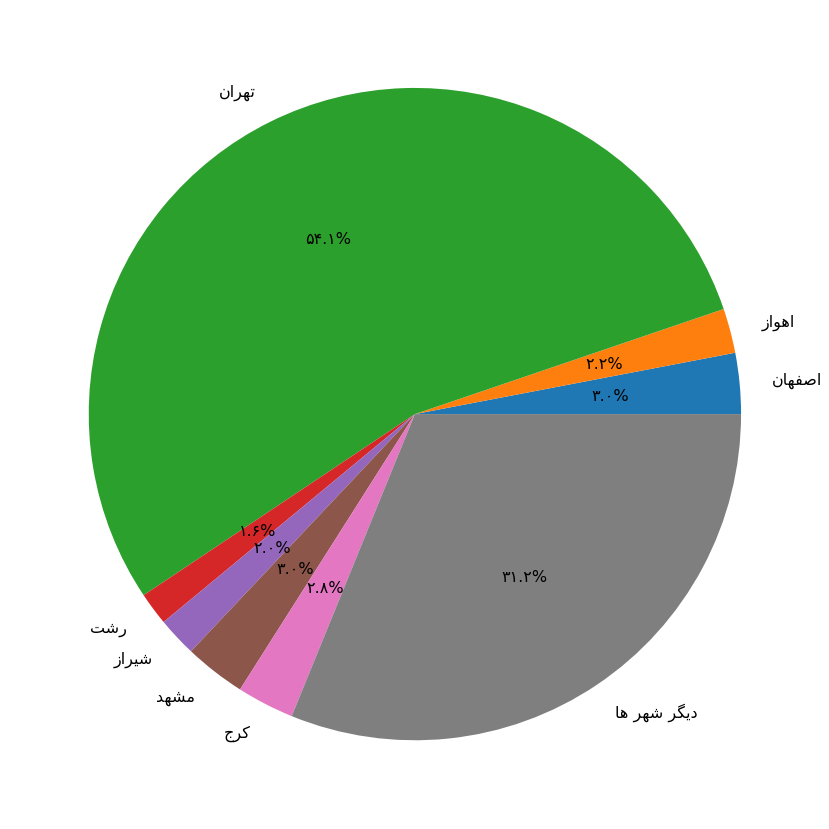

In [167]:
matplotlib.rc('font', **{'family': 'IranSans', 'size': 16})
labels = city.query("others > 1.5")['city_name_fa']
sizes = city.query("others > 1.5")['others']
persian_labels = [get_display(reshape(label)) for label in labels]

plt.figure(figsize=(15, 15))
plt.pie(sizes, labels=persian_labels, autopct=en_to_fa)